# Hotel Booking Cancellation EDA

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df["agent"].value_counts()[:5]

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
3.0       1336
37.0      1230
19.0      1061
40.0      1039
314.0      927
21.0       875
229.0      786
242.0      780
83.0       696
29.0       683
171.0      607
12.0       578
85.0       554
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       450
15.0       402
26.0       401
11.0       395
22.0       382
56.0       375
273.0      349
177.0      347
86.0       338
58.0       335
5.0        330
Name: agent, dtype: int64

In [7]:
df["company"].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

## Data Preprocessing

### Identify missing values

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.columns[df.isnull().sum()>0]

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [10]:
df.isnull().agg("sum").sort_values(ascending=False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [12]:
df.shape

(119390, 32)

In [13]:
(df.isnull().agg("sum").sort_values(ascending=False)[:4]/df.shape[0])*100

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

In [14]:
df1 = df.copy()

### Treat missing values

In [15]:
df1["company"].isnull().sum()

112593

In [16]:
df1.drop('company', axis=1,inplace=True)

In [17]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
df1.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [19]:
df1.agent.nunique()

333

In [20]:
df1.agent.mode()[0]

9.0

In [21]:
df1["agent"].fillna(df1.agent.mode()[0], inplace=True)

In [22]:
df1.agent.isnull().sum()

0

In [23]:
df1.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ASM        1
BFA        1
MDG        1
BDI        1
GUY        1
Name: country, Length: 177, dtype: int64

In [24]:
df1.country.isnull().sum()

488

In [25]:
df1.country.mode()[0]

'PRT'

In [26]:
country_mode = df1.country.mode()[0]

In [27]:
df1["country"].fillna(country_mode,inplace=True)

In [28]:
df1.country.isnull().sum()

0

In [29]:
df1.children.isnull().sum()

4

In [30]:
df1.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [31]:
df1.children.mode()[0]

0.0

In [32]:
df1.children.mean()

0.10388990333874994

In [33]:
df1.children.median()

0.0

In [34]:
children_mode = df1.children.mode()[0]

In [35]:
df1.children.fillna(children_mode, inplace=True)

In [36]:
df1.children.isnull().sum()

0

In [37]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [38]:
df1.shape

(119390, 31)

In [39]:
df1[(df1["adults"]+df1["children"]+df1["is_canceled"])==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,9.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,9.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [40]:
df1 = df1.loc[~((df1["adults"]+df1["children"]+df1["is_canceled"])==0)]

In [41]:
df1.shape

(119235, 31)

In [42]:
df1.adr.min()

-6.38

In [43]:
df1[df1.adr<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [44]:
df1 = df1[df1.adr>=0]

In [45]:
df1.shape

(119234, 31)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119234 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119234 non-null  object 
 1   is_canceled                     119234 non-null  int64  
 2   lead_time                       119234 non-null  int64  
 3   arrival_date_year               119234 non-null  int64  
 4   arrival_date_month              119234 non-null  object 
 5   arrival_date_week_number        119234 non-null  int64  
 6   arrival_date_day_of_month       119234 non-null  int64  
 7   stays_in_weekend_nights         119234 non-null  int64  
 8   stays_in_week_nights            119234 non-null  int64  
 9   adults                          119234 non-null  int64  
 10  children                        119234 non-null  float64
 11  babies                          119234 non-null  int64  
 12  meal            

In [47]:
object_columns = ['is_canceled','is_repeated_guest','agent']

In [48]:
for i in object_columns:
    df1[i] = df1[i].astype("object") #similar to df1["is_canceled"] = df1["is_canceled"].astype["object"]

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119234 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119234 non-null  object 
 1   is_canceled                     119234 non-null  object 
 2   lead_time                       119234 non-null  int64  
 3   arrival_date_year               119234 non-null  int64  
 4   arrival_date_month              119234 non-null  object 
 5   arrival_date_week_number        119234 non-null  int64  
 6   arrival_date_day_of_month       119234 non-null  int64  
 7   stays_in_weekend_nights         119234 non-null  int64  
 8   stays_in_week_nights            119234 non-null  int64  
 9   adults                          119234 non-null  int64  
 10  children                        119234 non-null  float64
 11  babies                          119234 non-null  int64  
 12  meal            

In [50]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119234.0,104.103125,106.879869,0.0,18.0,69.0,161.0,737.0
arrival_date_year,119234.0,2016.156516,0.707466,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119234.0,27.163175,13.601296,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119234.0,15.797826,8.780855,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119234.0,0.927001,0.995114,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119234.0,2.499027,1.897260,0.0,1.0,2.0,3.0,50.0
adults,119234.0,1.858815,0.575757,0.0,2.0,2.0,2.0,55.0
children,119234.0,0.104022,0.398798,0.0,0.0,0.0,0.0,10.0
babies,119234.0,0.007959,0.097499,0.0,0.0,0.0,0.0,10.0
previous_cancellations,119234.0,0.087190,0.844842,0.0,0.0,0.0,0.0,26.0


In [53]:
numerical_cols = list(df1.describe().columns)

In [61]:
numerical_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

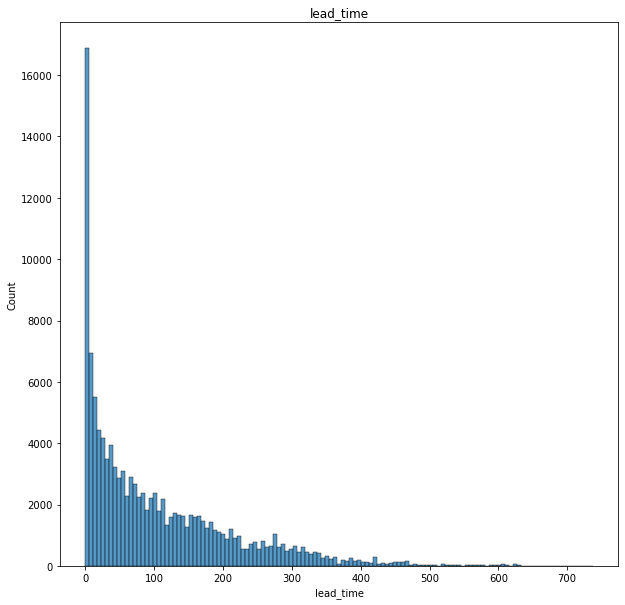

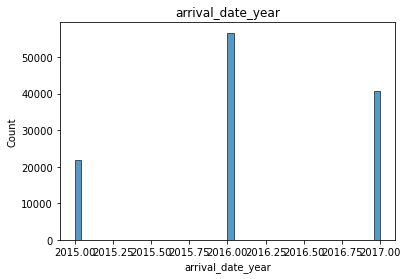

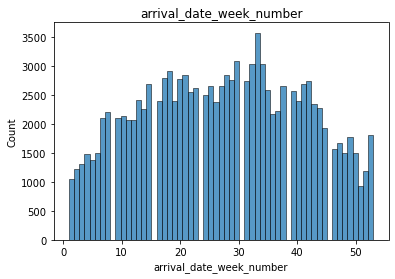

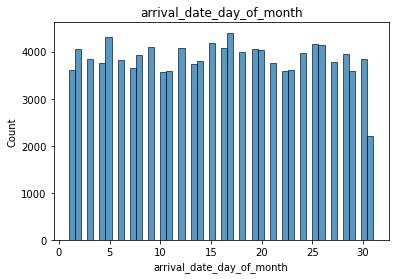

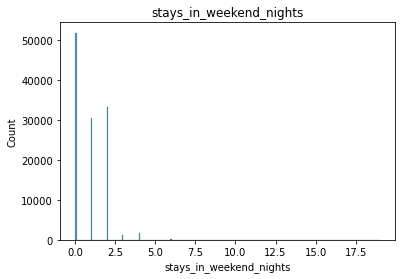

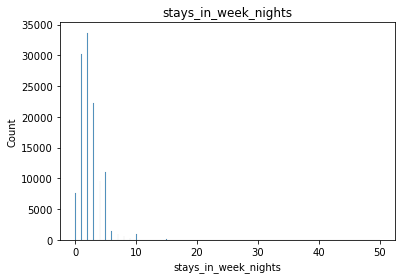

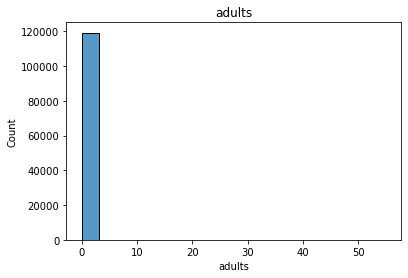

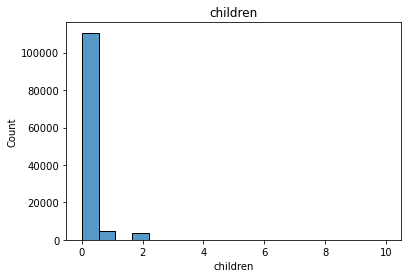

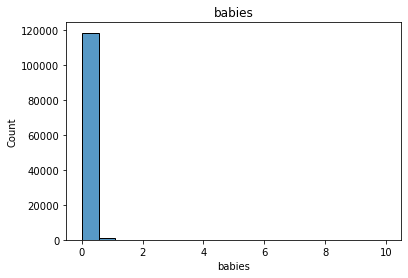

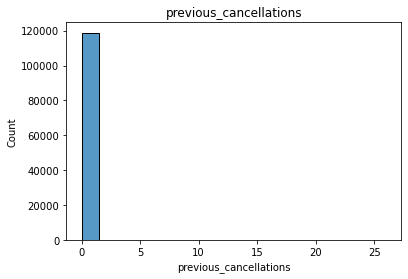

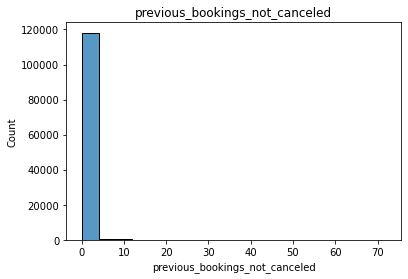

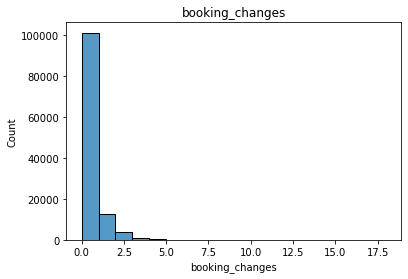

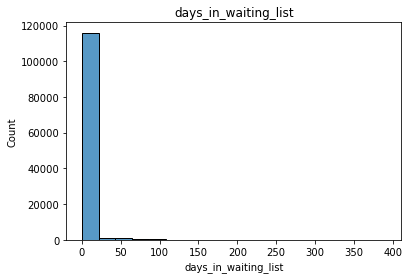

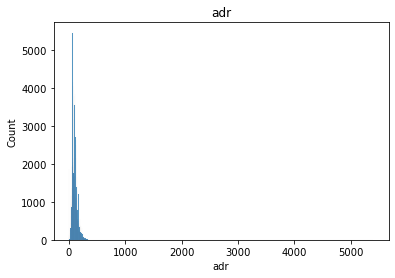

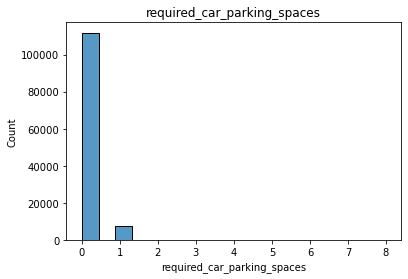

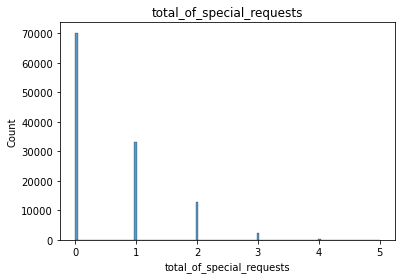

In [58]:
plt.figure(figsize = (10,10))
for i in numerical_cols:
    pt = sns.histplot(data = df1, x = i)
    plt.title(i)
    plt.show()

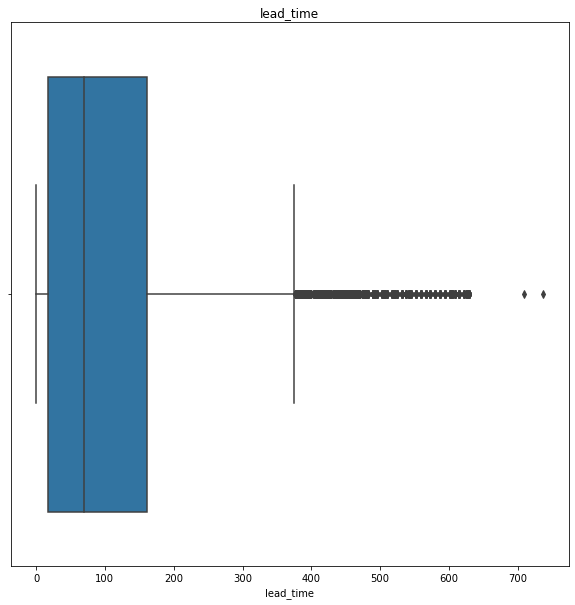

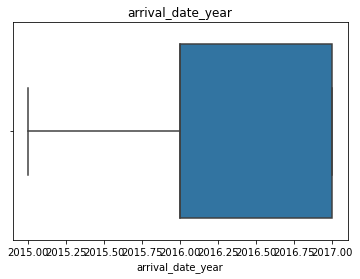

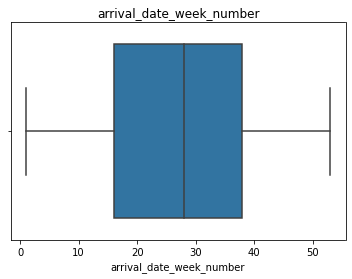

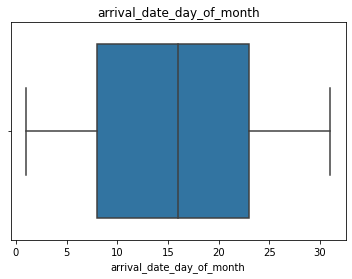

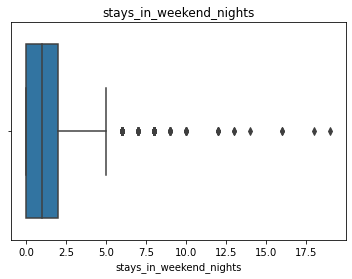

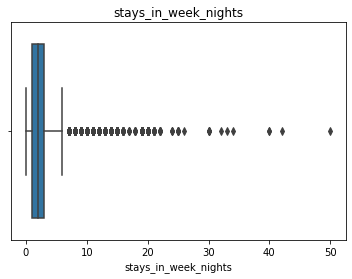

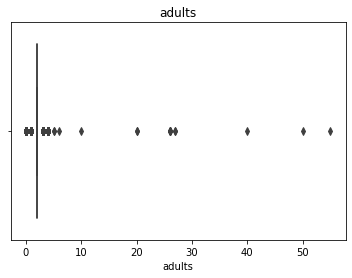

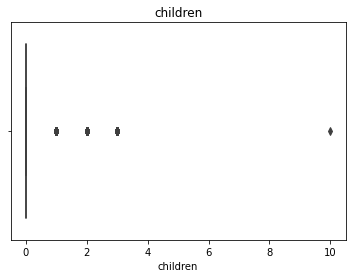

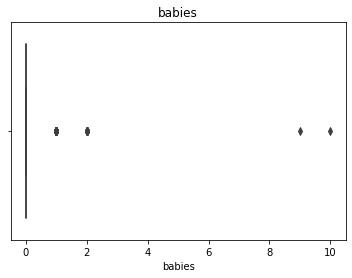

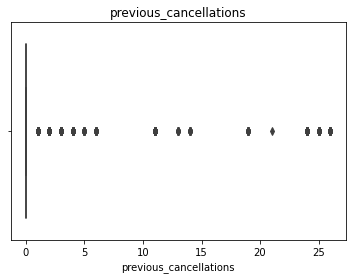

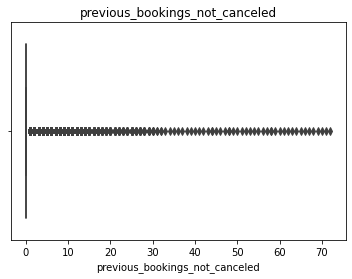

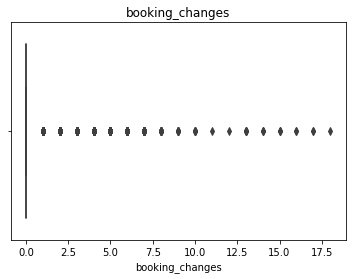

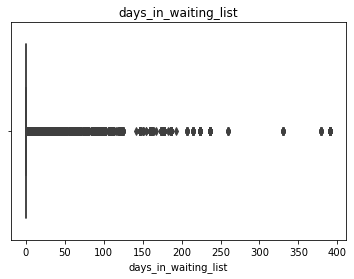

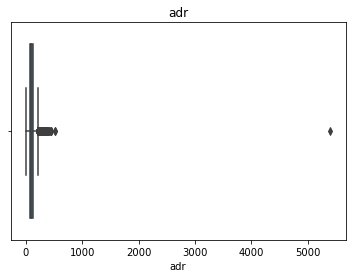

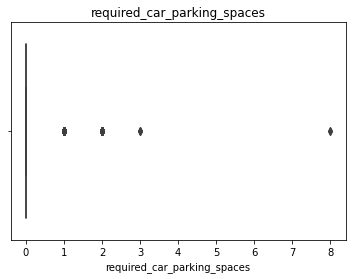

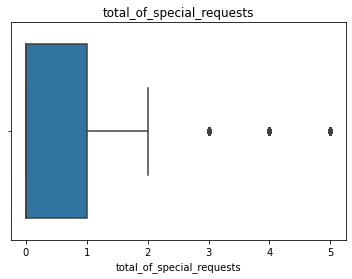

In [59]:
plt.figure(figsize = (10,10))
for i in numerical_cols:
    pt = sns.boxplot(data = df1, x = i)
    plt.title(i)
    plt.show()

In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119234.0,104.103125,106.879869,0.0,18.0,69.0,161.0,737.0
arrival_date_year,119234.0,2016.156516,0.707466,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119234.0,27.163175,13.601296,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119234.0,15.797826,8.780855,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119234.0,0.927001,0.995114,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119234.0,2.499027,1.897260,0.0,1.0,2.0,3.0,50.0
adults,119234.0,1.858815,0.575757,0.0,2.0,2.0,2.0,55.0
children,119234.0,0.104022,0.398798,0.0,0.0,0.0,0.0,10.0
babies,119234.0,0.007959,0.097499,0.0,0.0,0.0,0.0,10.0
previous_cancellations,119234.0,0.087190,0.844842,0.0,0.0,0.0,0.0,26.0


In [62]:
df1.shape

(119234, 31)

In [65]:
df1.loc[df1.lead_time > 450, 'lead_time']

1         737
890       460
4182      709
5704      468
5705      468
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 1106, dtype: int64

In [66]:
df1.loc[[0,10,20,50],["lead_time", "adr"]]

,lead_time,adr
0,342,0.00
10,23,123.00
20,37,97.29
50,113,67.58


In [70]:
df1.loc[df1.lead_time > 450, "lead_time"]

1         737
890       460
4182      709
5704      468
5705      468
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 1106, dtype: int64

In [68]:
a = np.array([10,20,40,50,100,200,400])
b = np.array([True,False,False,False,True,False,True])

In [69]:
a[b]

array([ 10, 100, 400])

In [71]:
df1.loc[df1.lead_time > 450, "lead_time"] = 450

In [72]:
df1.loc[df1.lead_time > 450, "lead_time"]

Series([], Name: lead_time, dtype: int64)

In [73]:
df1["lead_time"].mean()

103.55801197644968

In [75]:
df1.loc[df1.stays_in_weekend_nights > 10, "stays_in_weekend_nights"]

1655     13
3820     12
3850     12
9839     16
14037    18
14038    19
32589    13
33924    16
34614    12
34898    12
35059    12
54704    14
Name: stays_in_weekend_nights, dtype: int64

In [76]:
df1.loc[df1.stays_in_weekend_nights > 10, "stays_in_weekend_nights"] = 10

In [77]:
df1.loc[df1.stays_in_weekend_nights > 10, "stays_in_weekend_nights"]

Series([], Name: stays_in_weekend_nights, dtype: int64)

In [78]:
df1.loc[df1.stays_in_week_nights > 12, "stays_in_week_nights"]

87        15
1655      33
1790      20
2384      15
2696      14
          ..
101345    17
103282    25
105050    16
105525    13
106335    16
Name: stays_in_week_nights, Length: 297, dtype: int64

In [79]:
df1.loc[df1.stays_in_week_nights > 12, "stays_in_week_nights"] = 10

In [80]:
df1.loc[df1.stays_in_week_nights > 12, "stays_in_week_nights"]

Series([], Name: stays_in_week_nights, dtype: int64)

In [81]:
df1.loc[df1.booking_changes > 10, "booking_changes"]

1655      17
9106      16
23784     13
23849     12
38759     13
51773     13
51776     13
51853     13
51919     14
51952     15
51964     17
51977     15
102717    14
111682    18
111683    15
111689    16
111702    14
118579    11
Name: booking_changes, dtype: int64

In [82]:
df1.loc[df1.booking_changes > 10, "booking_changes"] = 10

In [85]:
df1.loc[df1.days_in_waiting_list > 60, "days_in_waiting_list"]

3106      65
3107      65
3108      65
3111      65
3112      65
          ..
109265    65
109305    63
109313    63
111263    84
112822    98
Name: days_in_waiting_list, Length: 1578, dtype: int64

In [86]:
df1.loc[df1.days_in_waiting_list > 60, "days_in_waiting_list"] = 60

In [90]:
df1.loc[df1.adr > 400, "adr"]

13142      450.00
13391      437.00
15083      508.00
39155      426.25
39568      402.00
48515     5400.00
103912     451.50
111403     510.00
Name: adr, dtype: float64

In [91]:
df1.loc[df1.adr > 400, "adr"] = 400

In [101]:
df1[df1.days_in_waiting_list > 10].index

Int64Index([  2272,   2486,   2487,   2488,   2490,   2491,   2492,   2493,
              2494,   2496,
            ...
            109313, 109853, 110155, 110996, 111263, 111300, 111978, 112822,
            114733, 115990],
           dtype='int64', length=3514)

In [99]:
df1.drop(df1[df1.days_in_waiting_list > 10].index,axis=0)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,450,2015,July,27,1,0,0,2,...,4,No Deposit,9,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [92]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119234.0,103.558012,104.805534,0.0,18.0,69.0,161.0,450.0
arrival_date_year,119234.0,2016.156516,0.707466,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119234.0,27.163175,13.601296,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119234.0,15.797826,8.780855,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119234.0,0.926590,0.990213,0.0,0.0,1.0,2.0,10.0
stays_in_week_nights,119234.0,2.480014,1.764143,0.0,1.0,2.0,3.0,12.0
adults,119234.0,1.858815,0.575757,0.0,2.0,2.0,2.0,55.0
children,119234.0,0.104022,0.398798,0.0,0.0,0.0,0.0,10.0
babies,119234.0,0.007959,0.097499,0.0,0.0,0.0,0.0,10.0
previous_cancellations,119234.0,0.087190,0.844842,0.0,0.0,0.0,0.0,26.0


## Visualisation (EDA)

In [93]:
df1.corr()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.037737,0.130212,0.002293,0.090802,0.183314,0.119395,-0.037250,-0.020987,0.088250,-0.074575,0.002826,0.154597,-0.065117,-0.117574,-0.094667
arrival_date_year,0.037737,1.000000,-0.540360,-0.000100,0.021633,0.030663,0.029995,0.054689,-0.013197,-0.119906,0.029213,0.031914,-0.082595,0.208309,-0.013826,0.108595
arrival_date_week_number,0.130212,-0.540360,1.000000,0.066506,0.019126,0.024870,0.026619,0.005559,0.010417,0.035491,-0.020991,0.006557,0.013006,0.080981,0.001984,0.026164
arrival_date_day_of_month,0.002293,-0.000100,0.066506,1.000000,-0.016018,-0.025137,-0.001389,0.014575,-0.000227,-0.027036,-0.000283,0.011218,0.029902,0.031116,0.008595,0.003110
stays_in_weekend_nights,0.090802,0.021633,0.019126,-0.016018,1.000000,0.456430,0.095388,0.046480,0.018735,-0.012761,-0.043127,0.049277,-0.067567,0.054796,-0.018490,0.073002
stays_in_week_nights,0.183314,0.030663,0.024870,-0.025137,0.456430,1.000000,0.105465,0.048905,0.022258,-0.014159,-0.052010,0.077020,-0.006647,0.083822,-0.025181,0.073751
adults,0.119395,0.029995,0.026619,-0.001389,0.095388,0.105465,1.000000,0.029554,0.017926,-0.007056,-0.108678,-0.042164,-0.025014,0.236367,0.014595,0.123526
children,-0.037250,0.054689,0.005559,0.014575,0.046480,0.048905,0.029554,1.000000,0.024004,-0.024754,-0.021071,0.051843,-0.042611,0.341440,0.056259,0.081764
babies,-0.020987,-0.013197,0.010417,-0.000227,0.018735,0.022258,0.017926,0.024004,1.000000,-0.007508,-0.006550,0.087470,-0.013442,0.030596,0.037393,0.097938
previous_cancellations,0.088250,-0.119906,0.035491,-0.027036,-0.012761,-0.014159,-0.007056,-0.024754,-0.007508,1.000000,0.152570,-0.027717,0.022938,-0.069149,-0.018539,-0.048488


<AxesSubplot:>

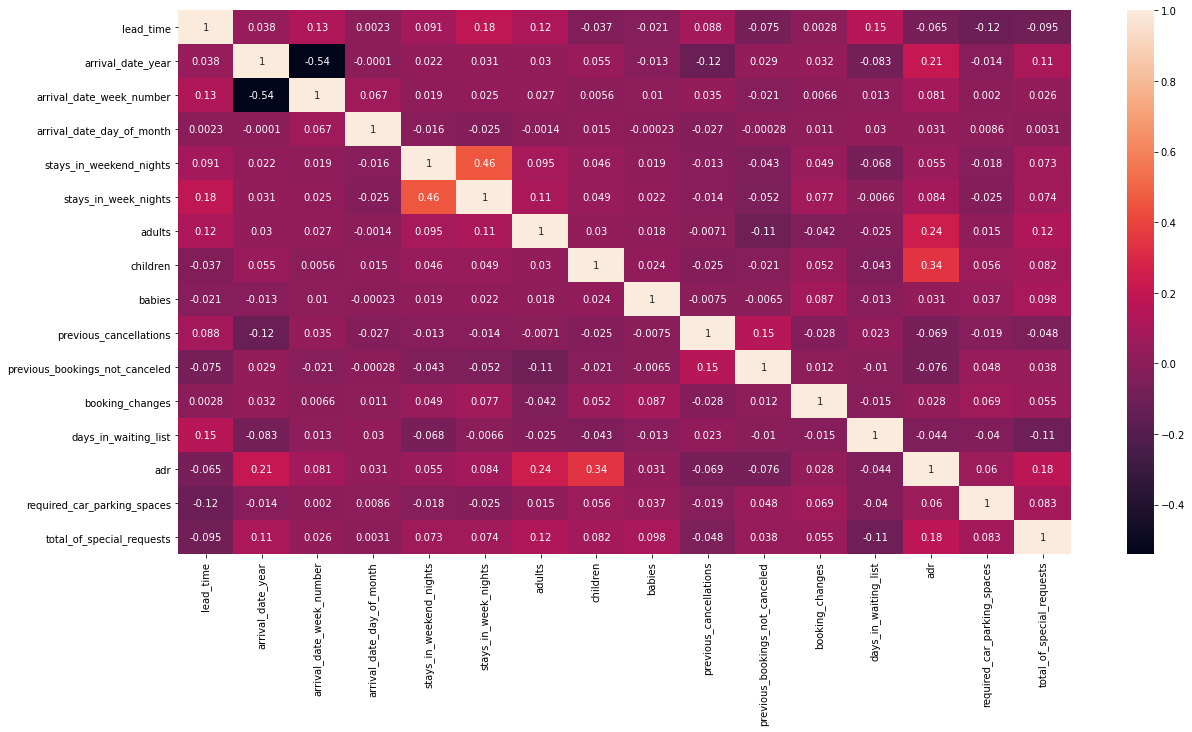

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True)

In [106]:
tip = sns.load_dataset('tips')

In [107]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:>

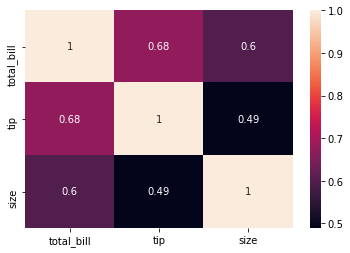

In [108]:
sns.heatmap(tip.corr(), annot=True)

In [109]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,450,2015,July,27,1,0,0,2,...,4,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [110]:
df1.hotel.value_counts()

City Hotel      79186
Resort Hotel    40048
Name: hotel, dtype: int64

<AxesSubplot:xlabel='hotel', ylabel='count'>

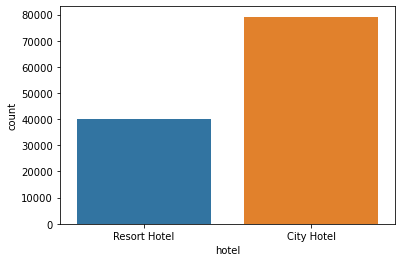

In [111]:
sns.countplot(x = "hotel", data=df1)

<AxesSubplot:xlabel='hotel', ylabel='count'>

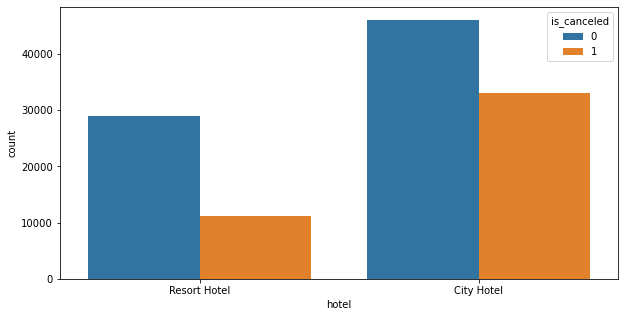

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x = "hotel", data=df1, hue='is_canceled')

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

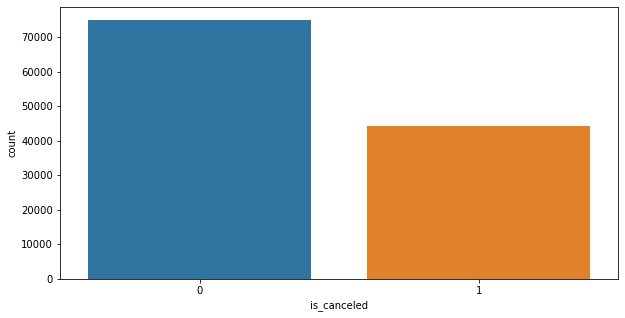

In [116]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'is_canceled', data=df1)

In [117]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

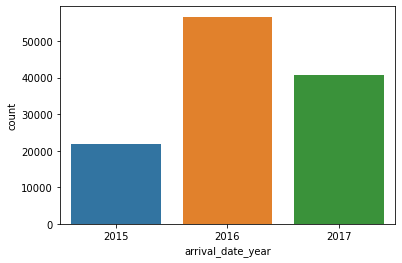

In [118]:
sns.countplot(data = df1, x = 'arrival_date_year')

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

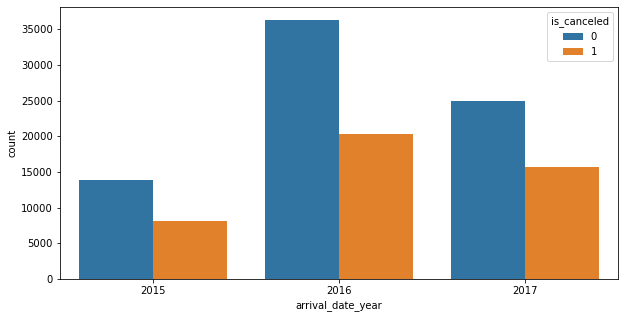

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(data = df1, x = 'arrival_date_year', hue= 'is_canceled')

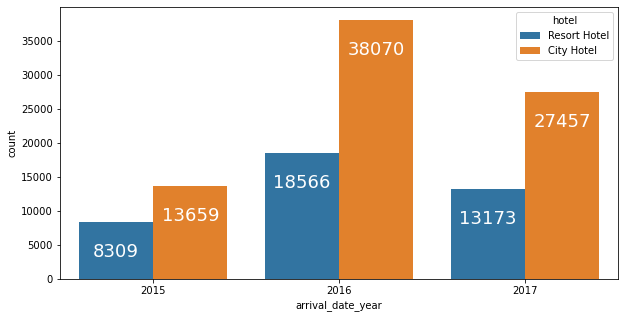

In [124]:
plt.figure(figsize=(10,5))
pt = sns.countplot(data = df1, x = 'arrival_date_year', hue= 'hotel')
for p in pt.patches:
    pt.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [126]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

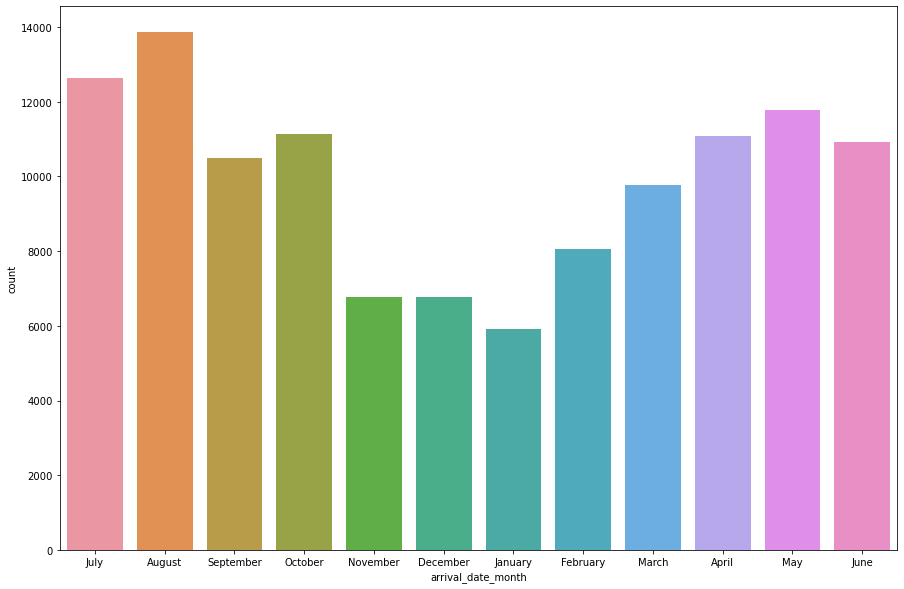

In [128]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'arrival_date_month', data=df1)

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

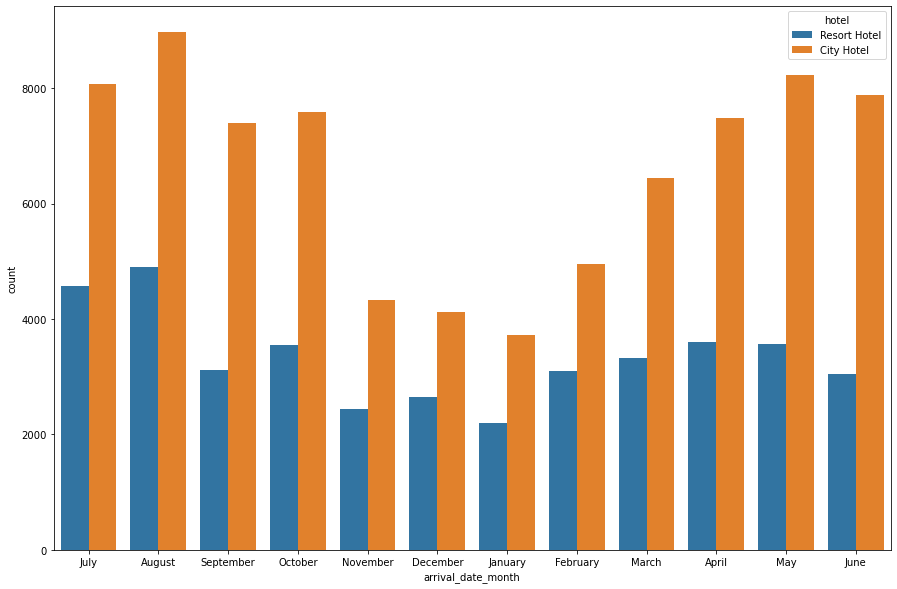

In [129]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'arrival_date_month', data=df1, hue= 'hotel')

In [132]:
df1.stays_in_weekend_nights.value_counts()[:5]

0    51911
2    33274
1    30615
4     1847
3     1252
Name: stays_in_weekend_nights, dtype: int64

In [133]:
order_stay = df1.stays_in_weekend_nights.value_counts()[:5].index

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='count'>

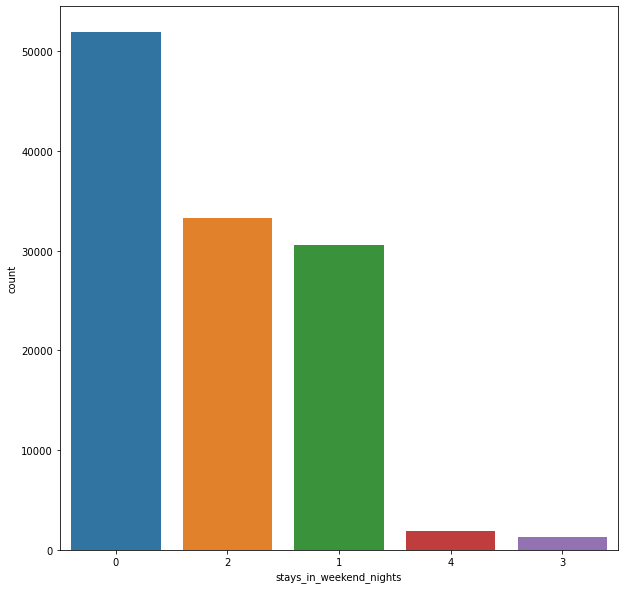

In [134]:
plt.figure(figsize=(10,10))
sns.countplot(x='stays_in_weekend_nights', data=df1, order=order_stay)

In [136]:
df1.stays_in_week_nights.value_counts()

2     33671
1     30293
3     22245
5     11068
4      9548
0      7585
6      1493
10     1327
7      1024
8       654
9       228
11       56
12       42
Name: stays_in_week_nights, dtype: int64

In [141]:
order_stay = df1.stays_in_weekend_nights.value_counts()[:7].index

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='count'>

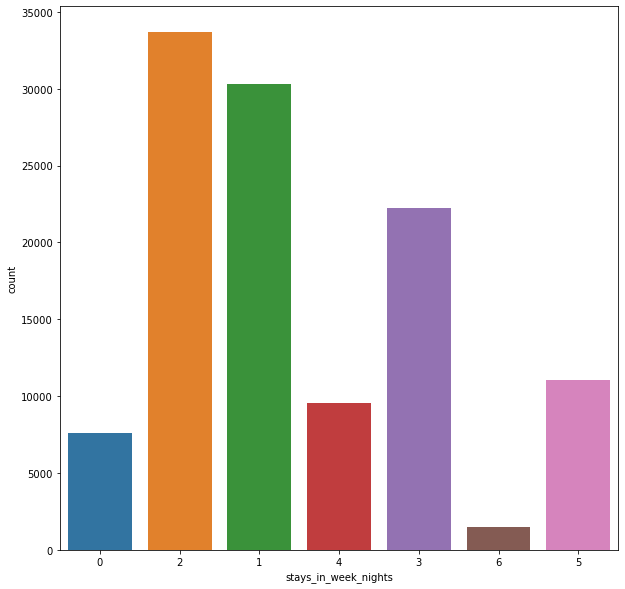

In [142]:
plt.figure(figsize=(10,10))
sns.countplot(x='stays_in_week_nights', data=df1, order=order_stay)

In [143]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119234 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119234 non-null  object 
 1   is_canceled                     119234 non-null  object 
 2   lead_time                       119234 non-null  int64  
 3   arrival_date_year               119234 non-null  int64  
 4   arrival_date_month              119234 non-null  object 
 5   arrival_date_week_number        119234 non-null  int64  
 6   arrival_date_day_of_month       119234 non-null  int64  
 7   stays_in_weekend_nights         119234 non-null  int64  
 8   stays_in_week_nights            119234 non-null  int64  
 9   adults                          119234 non-null  int64  
 10  children                        119234 non-null  float64
 11  babies                          119234 non-null  int64  
 12  meal            

<AxesSubplot:xlabel='meal', ylabel='count'>

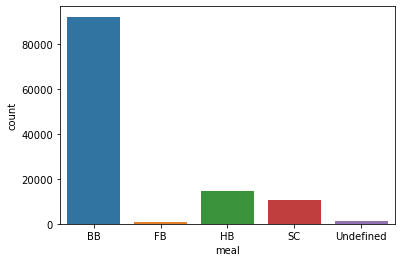

In [145]:
sns.countplot(x="meal", data=df1)

<AxesSubplot:xlabel='meal', ylabel='count'>

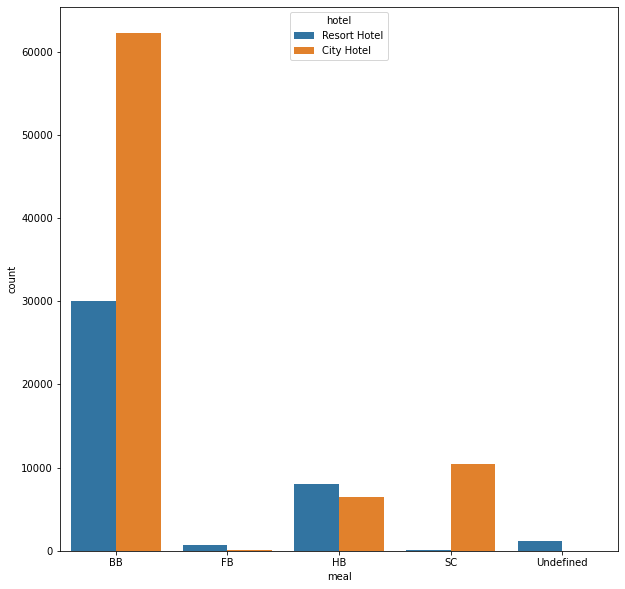

In [146]:
plt.figure(figsize=(10,10))
sns.countplot(x="meal", data=df1, hue='hotel')

In [147]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

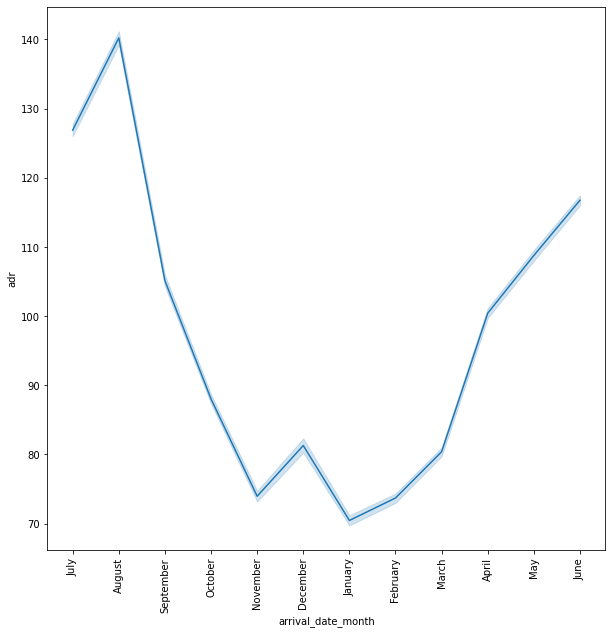

In [155]:
plt.figure(figsize=(10,10))
sns.lineplot(x='arrival_date_month',y='adr',data=df1)
plt.xticks(rotation=90)
plt.savefig('test.png',bbox_inches = 'tight', facecolor = 'white')